In [1]:
## import the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## import the taxi data from seaborn
taxi = sns.load_dataset('taxis')
taxi.head()

,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough
0,2019-03-23 20:21:09,2019-03-23 20:27:24,1,1.60,7.0,2.15,0.0,12.95,yellow,credit card,Lenox Hill West,UN/Turtle Bay South,Manhattan,Manhattan
1,2019-03-04 16:11:55,2019-03-04 16:19:00,1,0.79,5.0,0.00,0.0,9.30,yellow,cash,Upper West Side South,Upper West Side South,Manhattan,Manhattan
2,2019-03-27 17:53:01,2019-03-27 18:00:25,1,1.37,7.5,2.36,0.0,14.16,yellow,credit card,Alphabet City,West Village,Manhattan,Manhattan
3,2019-03-10 01:23:59,2019-03-10 01:49:51,1,7.70,27.0,6.15,0.0,36.95,yellow,credit card,Hudson Sq,Yorkville West,Manhattan,Manhattan
4,2019-03-30 13:27:42,2019-03-30 13:37:14,3,2.16,9.0,1.10,0.0,13.40,yellow,credit card,Midtown East,Yorkville West,Manhattan,Manhattan


## Steps in performing a data science project
- Define the problem
- Collect the data
- Prepare the data
- Explore the data
- Model the data
- Evaluate the model
- Deploy the model

## Problem statement

- Can we predict if a car is yellow or green

<Axes: xlabel='color'>

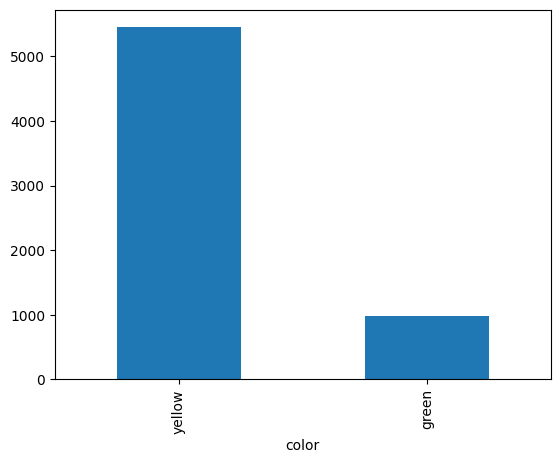

In [3]:
# check the distribution of the color column
taxi['color'].value_counts()

# plot the distribution of the color column
taxi['color'].value_counts().plot(kind='bar')

In [5]:
taxi.groupby('color')['passengers'].sum()

color
green     1226
yellow    8676
Name: passengers, dtype: int64

<Axes: xlabel='color'>

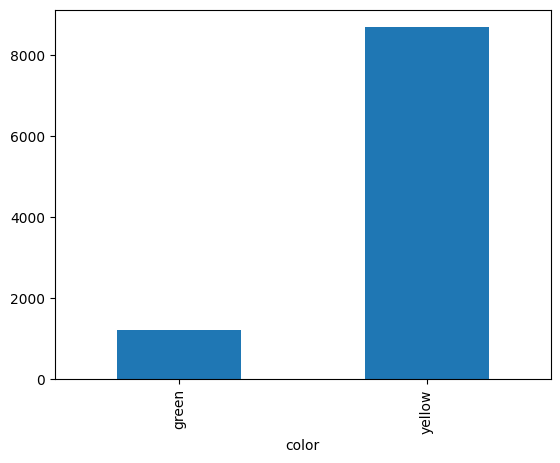

In [4]:
# plot the count of passengers for each color
taxi.groupby('color')['passengers'].sum().plot(kind='bar')

- We have two different types of cars, yellow and green. The yellow cars are the majority class and the green cars are the minority class. 
- We've confirmed this again with total number of passengers in the dataset.

In [9]:
## summary statistics for the passengers column for each color
taxi.groupby('color')['passengers'].describe()

,count,mean,std,min,25%,50%,75%,max
color,,,,,,,,
green,982.0,1.248473,0.857522,0.0,1.0,1.0,1.0,6.0
yellow,5451.0,1.591635,1.248925,0.0,1.0,1.0,2.0,6.0


<Axes: ylabel='Frequency'>

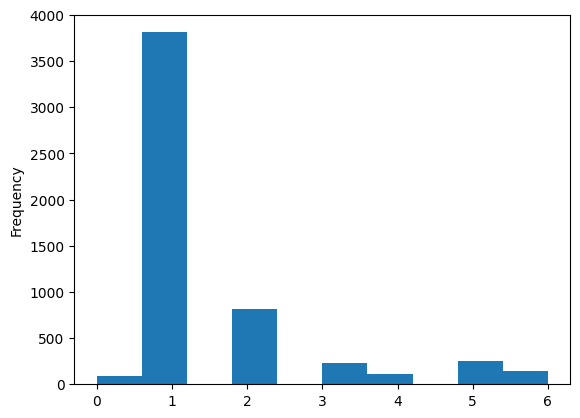

In [7]:
# histogram of the passengers column where color is yellow
taxi[taxi['color'] == 'yellow']['passengers'].plot(kind='hist')

<Axes: ylabel='Frequency'>

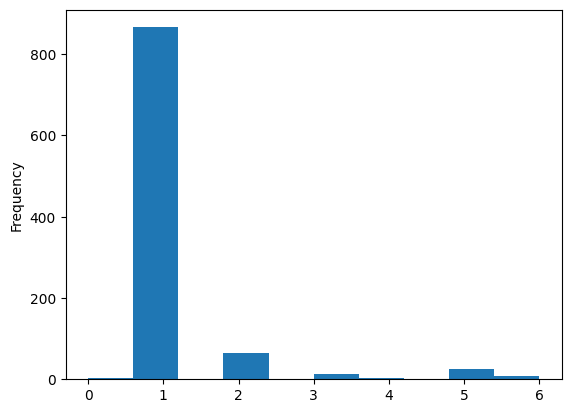

In [8]:
taxi[taxi['color'] == 'green']['passengers'].plot(kind='hist')

## Feature Ingeneering

In [11]:
# check if data has missing values (percentage of missing values for each column)
taxi.isnull().mean() * 100

pickup             0.000000
dropoff            0.000000
passengers         0.000000
distance           0.000000
fare               0.000000
tip                0.000000
tolls              0.000000
total              0.000000
color              0.000000
payment            0.683973
pickup_zone        0.404166
dropoff_zone       0.699518
pickup_borough     0.404166
dropoff_borough    0.699518
dtype: float64

In [12]:
# drop the rows with missing values
taxi.dropna(inplace=True)

In [13]:
# check for duplicates
taxi.duplicated().sum()

0

In [14]:
taxi.head()

,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough
0,2019-03-23 20:21:09,2019-03-23 20:27:24,1,1.60,7.0,2.15,0.0,12.95,yellow,credit card,Lenox Hill West,UN/Turtle Bay South,Manhattan,Manhattan
1,2019-03-04 16:11:55,2019-03-04 16:19:00,1,0.79,5.0,0.00,0.0,9.30,yellow,cash,Upper West Side South,Upper West Side South,Manhattan,Manhattan
2,2019-03-27 17:53:01,2019-03-27 18:00:25,1,1.37,7.5,2.36,0.0,14.16,yellow,credit card,Alphabet City,West Village,Manhattan,Manhattan
3,2019-03-10 01:23:59,2019-03-10 01:49:51,1,7.70,27.0,6.15,0.0,36.95,yellow,credit card,Hudson Sq,Yorkville West,Manhattan,Manhattan
4,2019-03-30 13:27:42,2019-03-30 13:37:14,3,2.16,9.0,1.10,0.0,13.40,yellow,credit card,Midtown East,Yorkville West,Manhattan,Manhattan


In [16]:
# create the year column, month column, and day column from pickup column
taxi['year'] = taxi['pickup'].dt.year
taxi['month'] = taxi['pickup'].dt.month
taxi['day'] = taxi['pickup'].dt.day

taxi.head()

,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough,year,month,day
0,2019-03-23 20:21:09,2019-03-23 20:27:24,1,1.60,7.0,2.15,0.0,12.95,yellow,credit card,Lenox Hill West,UN/Turtle Bay South,Manhattan,Manhattan,2019,3,23
1,2019-03-04 16:11:55,2019-03-04 16:19:00,1,0.79,5.0,0.00,0.0,9.30,yellow,cash,Upper West Side South,Upper West Side South,Manhattan,Manhattan,2019,3,4
2,2019-03-27 17:53:01,2019-03-27 18:00:25,1,1.37,7.5,2.36,0.0,14.16,yellow,credit card,Alphabet City,West Village,Manhattan,Manhattan,2019,3,27
3,2019-03-10 01:23:59,2019-03-10 01:49:51,1,7.70,27.0,6.15,0.0,36.95,yellow,credit card,Hudson Sq,Yorkville West,Manhattan,Manhattan,2019,3,10
4,2019-03-30 13:27:42,2019-03-30 13:37:14,3,2.16,9.0,1.10,0.0,13.40,yellow,credit card,Midtown East,Yorkville West,Manhattan,Manhattan,2019,3,30


In [17]:
# the difference between the dropoff and pickup time in minutes
taxi['time_diff'] = (taxi['dropoff'] - taxi['pickup']).dt.seconds / 60

taxi.head()

,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough,year,month,day,time_diff
0,2019-03-23 20:21:09,2019-03-23 20:27:24,1,1.60,7.0,2.15,0.0,12.95,yellow,credit card,Lenox Hill West,UN/Turtle Bay South,Manhattan,Manhattan,2019,3,23,6.250000
1,2019-03-04 16:11:55,2019-03-04 16:19:00,1,0.79,5.0,0.00,0.0,9.30,yellow,cash,Upper West Side South,Upper West Side South,Manhattan,Manhattan,2019,3,4,7.083333
2,2019-03-27 17:53:01,2019-03-27 18:00:25,1,1.37,7.5,2.36,0.0,14.16,yellow,credit card,Alphabet City,West Village,Manhattan,Manhattan,2019,3,27,7.400000
3,2019-03-10 01:23:59,2019-03-10 01:49:51,1,7.70,27.0,6.15,0.0,36.95,yellow,credit card,Hudson Sq,Yorkville West,Manhattan,Manhattan,2019,3,10,25.866667
4,2019-03-30 13:27:42,2019-03-30 13:37:14,3,2.16,9.0,1.10,0.0,13.40,yellow,credit card,Midtown East,Yorkville West,Manhattan,Manhattan,2019,3,30,9.533333


<Axes: >

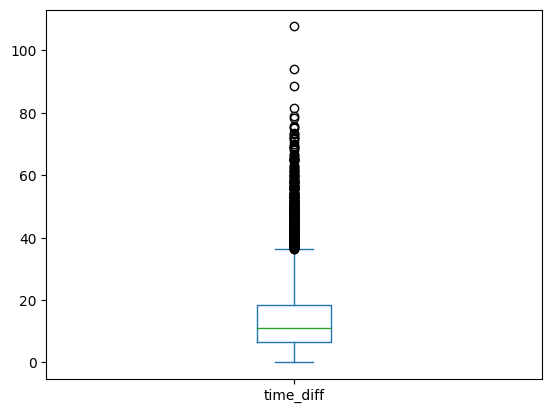

In [19]:
# plot the distribution of the time_diff column
taxi['time_diff'].plot(kind='box')

In [20]:
taxi.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6341 entries, 0 to 6432
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   pickup           6341 non-null   datetime64[ns]
 1   dropoff          6341 non-null   datetime64[ns]
 2   passengers       6341 non-null   int64         
 3   distance         6341 non-null   float64       
 4   fare             6341 non-null   float64       
 5   tip              6341 non-null   float64       
 6   tolls            6341 non-null   float64       
 7   total            6341 non-null   float64       
 8   color            6341 non-null   object        
 9   payment          6341 non-null   object        
 10  pickup_zone      6341 non-null   object        
 11  dropoff_zone     6341 non-null   object        
 12  pickup_borough   6341 non-null   object        
 13  dropoff_borough  6341 non-null   object        
 14  year             6341 non-null   int32       

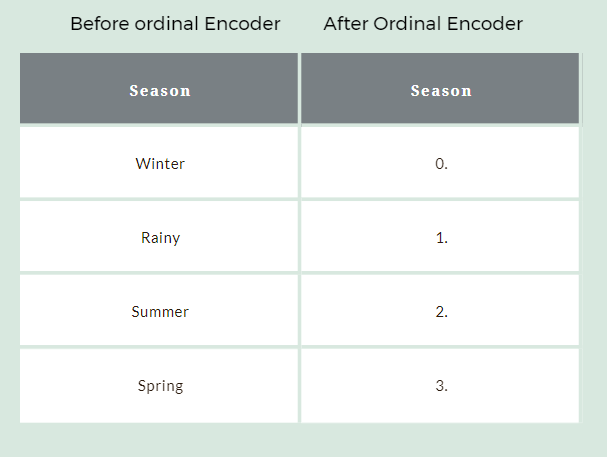

In [21]:
## encode categorical columns
categorical_cols = taxi.select_dtypes(include=['object']).columns

# import ordinal encoder
from sklearn.preprocessing import OrdinalEncoder

# instantiate the encoder
encoder = OrdinalEncoder()

# encode the categorical columns
for col in categorical_cols:
    taxi[col] = encoder.fit_transform(taxi[[col]])

taxi.head()

,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough,year,month,day,time_diff
0,2019-03-23 20:21:09,2019-03-23 20:27:24,1,1.60,7.0,2.15,0.0,12.95,1.0,1.0,99.0,176.0,2.0,2.0,2019,3,23,6.250000
1,2019-03-04 16:11:55,2019-03-04 16:19:00,1,0.79,5.0,0.00,0.0,9.30,1.0,0.0,174.0,182.0,2.0,2.0,2019,3,4,7.083333
2,2019-03-27 17:53:01,2019-03-27 18:00:25,1,1.37,7.5,2.36,0.0,14.16,1.0,1.0,1.0,190.0,2.0,2.0,2019,3,27,7.400000
3,2019-03-10 01:23:59,2019-03-10 01:49:51,1,7.70,27.0,6.15,0.0,36.95,1.0,1.0,86.0,202.0,2.0,2.0,2019,3,10,25.866667
4,2019-03-30 13:27:42,2019-03-30 13:37:14,3,2.16,9.0,1.10,0.0,13.40,1.0,1.0,116.0,202.0,2.0,2.0,2019,3,30,9.533333


In [22]:
## drop the pickup and dropoff columns
taxi.drop(['pickup', 'dropoff'], axis=1, inplace=True)

In [23]:
# split my data into features and target variable
X = taxi.drop('color', axis=1)
y = taxi['color']

# import the train_test_split function
from sklearn.model_selection import train_test_split

# split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [24]:
# create our decision tree classifier
from sklearn.tree import DecisionTreeClassifier

# instantiate the classifier
tree = DecisionTreeClassifier()
tree_all = DecisionTreeClassifier()

# fit the model
tree.fit(X_train, y_train)
tree_all.fit(X, y)

# make predictions
y_pred = tree.predict(X_test)
y_pred_all = tree_all.predict(X)

# import the accuracy metric
from sklearn.metrics import accuracy_score

# calculate the accuracy
print('test accuracy:', accuracy_score(y_test, y_pred))
print('all data accuracy:', accuracy_score(y, y_pred_all))

test accuracy: 0.9264319495533369
all data accuracy: 1.0
